In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('cleaned_cpu_data_processed.csv')

In [26]:
# Count core category by designer
core_category_counts = df.groupby(['Designer', 'Core Category']).size().unstack(fill_value=0)
print(core_category_counts)

Core Category          ARM Cortex  Big.LITTLE  Other  Qualcomm Kryo
Designer                                                           
Acorn                           0           0      4              0
Actions Semiconductor           1           2      0              0
Allwinner                       1           4      0              0
Amd                             0           0      3              0
Amlogic                         2           2      0              0
Apple                           1          53      0              0
Arm                             6           4     41              0
Broadcom                        2           5      2              0
Centrality                      0           0      5              0
Cirrus Logic                    0           0      2              0
Dec                             0           0      2              0
Hisilicon                       0          46      1              0
Hitachi                         0           0   

In [27]:
# Average processor core count per core category
avg_core_count = df.groupby('Core Category')['Number of processor core(s)'].mean()
print("\nAverage CPU Cores by Core Category:\n", avg_core_count)


Average CPU Cores by Core Category:
 Core Category
ARM Cortex       1.666667
Big.LITTLE       5.830189
Other            1.642105
Qualcomm Kryo    7.565217
Name: Number of processor core(s), dtype: float64


In [28]:
# Clean GPU fields
df['GPU Cores'] = df['Number of GPU cores'].astype(str).str.extract(r'(\d+)').astype(float)
df['GPU Clock (MHz)'] = df['GPU Clock'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

In [29]:
# GPU performance proxy
df['GPU Score'] = df['GPU Cores'] * df['GPU Clock (MHz)']

In [30]:
# Top 10 GPU performers
top_gpu = df[['Designer', 'Type', 'GPU Score']].sort_values(by='GPU Score', ascending=False).head(10)
print("\nTop 10 GPU Performers:\n", top_gpu)


Top 10 GPU Performers:
     Designer                           Type  GPU Score
478   Nvidia                    Tegra K1-64   182400.0
479   Nvidia                    Tegra K1-32   182400.0
578   Nvidia                   Tegra 4 Ap40    48384.0
576   Nvidia                    Tegra 4 T43    48384.0
577   Nvidia                   Tegra 4 T40X    48384.0
127    Apple       M1 Max Apl1105 / Apl1W05    41472.0
480   Nvidia                  Tegra 4I Sp3X    36000.0
126    Apple  M1 Max Lite Apl1105 / Apl1W05    31104.0
48     Apple       M2 Pro Apl1113 / Apl1W13    26562.0
129    Apple       M1 Pro Apl1103 / Apl1W03    20736.0


In [31]:
# Average GPU Score by Designer
avg_gpu_by_designer = df.groupby('Designer')['GPU Score'].mean().sort_values(ascending=False)
print("\nAverage GPU Score by Designer:\n", avg_gpu_by_designer)


Average GPU Score by Designer:
 Designer
Nvidia                   44332.923077
Apple                     8961.368421
Hisilicon                 5166.054054
Intel                     4137.388889
Samsung                   3905.534884
Mediatek                  3300.928571
Qualcomm                  2072.526316
Unisoc                    1660.666667
Rockchip                  1266.666667
Spreadtrum                1150.000000
Allwinner                  873.333333
Amlogic                    433.333333
Texas Instruments          344.500000
Samsung-Intrinsity         200.000000
Philips                     80.000000
Acorn                             NaN
Actions Semiconductor             NaN
Amd                               NaN
Arm                               NaN
Broadcom                          NaN
Centrality                        NaN
Cirrus Logic                      NaN
Dec                               NaN
Hitachi                           NaN
Ingenic                           NaN
Jlq     

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17588\179791212.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_gpu_by_designer.values, y=avg_gpu_by_designer.index, palette='mako')


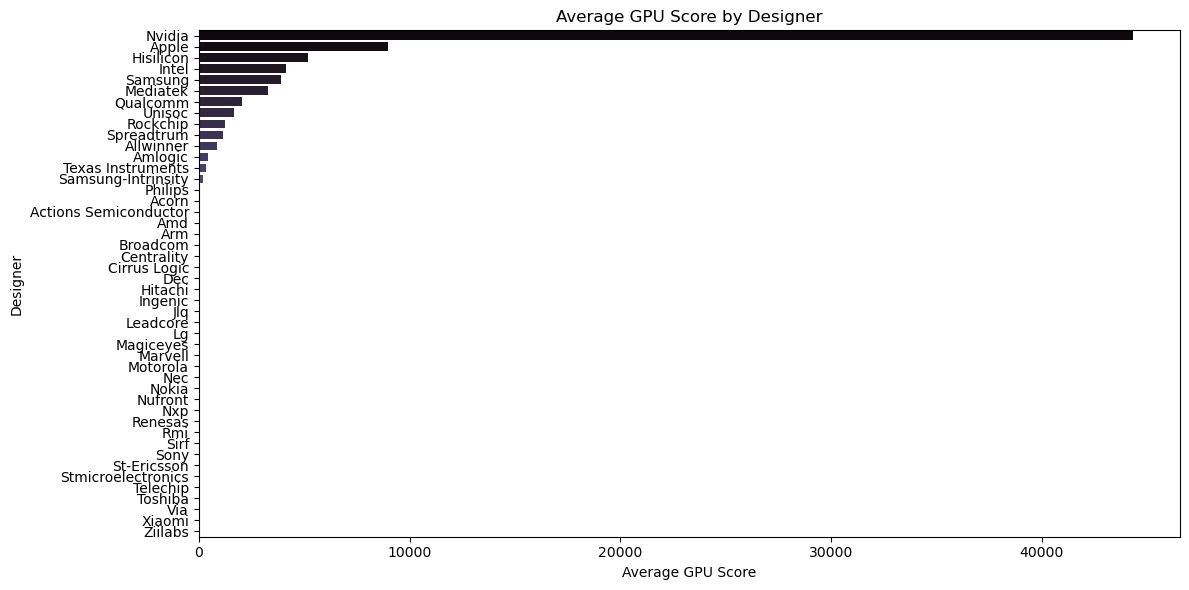

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_gpu_by_designer.values, y=avg_gpu_by_designer.index, palette='mako')
plt.xlabel("Average GPU Score")
plt.title("Average GPU Score by Designer")
plt.tight_layout()
plt.show()


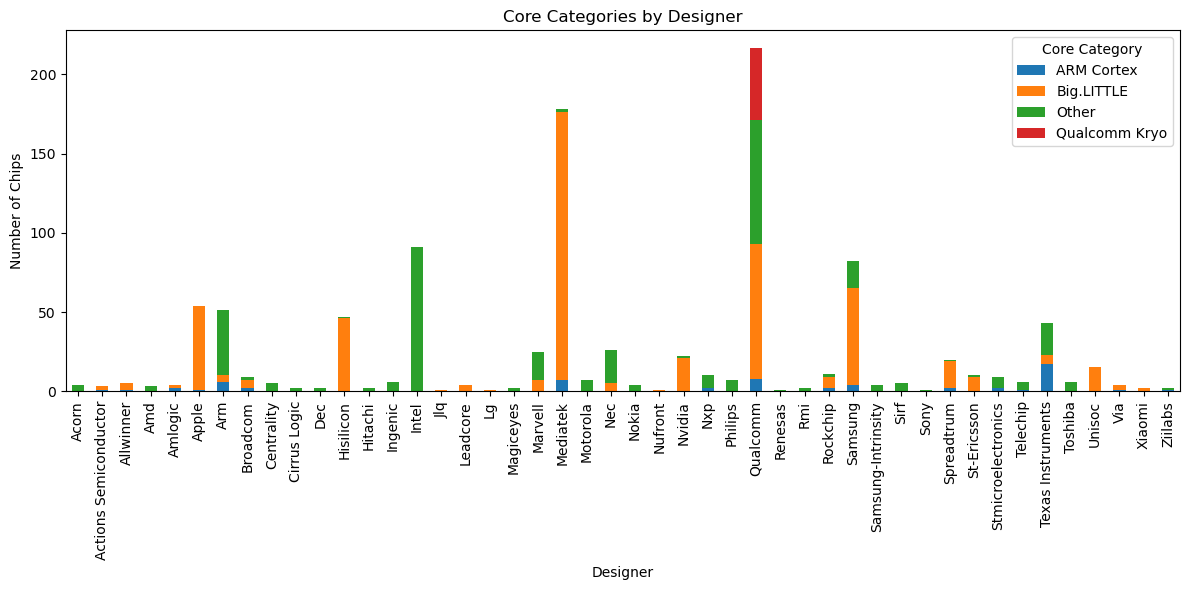

In [33]:
core_counts = df.groupby(['Designer', 'Core Category']).size().unstack(fill_value=0)
core_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Core Categories by Designer")
plt.ylabel("Number of Chips")
plt.tight_layout()
plt.show()


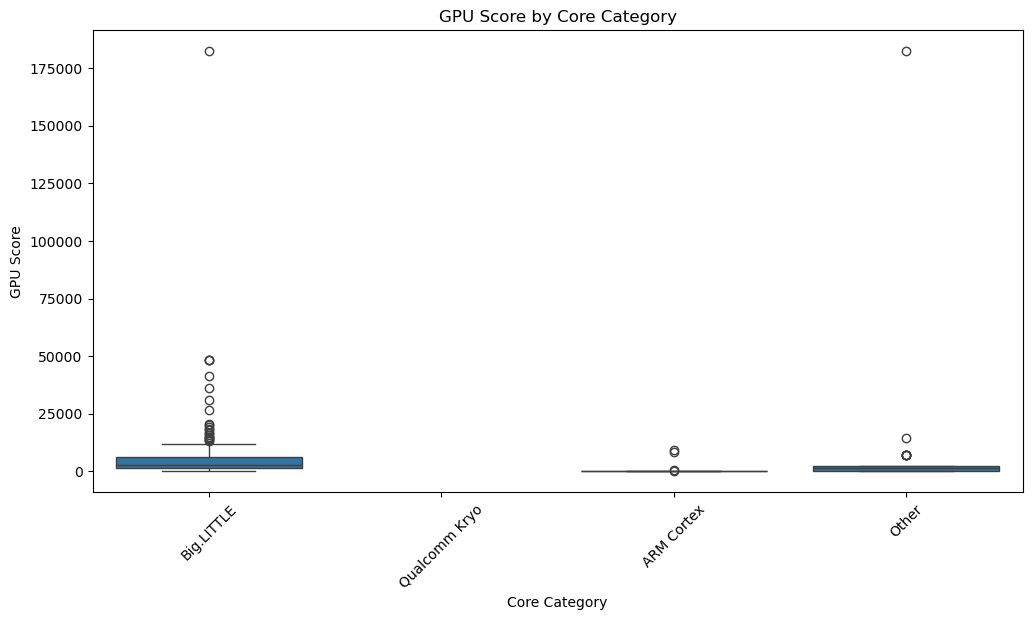

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Core Category', y='GPU Score')
plt.title("GPU Score by Core Category")
plt.xticks(rotation=45)
plt.show()

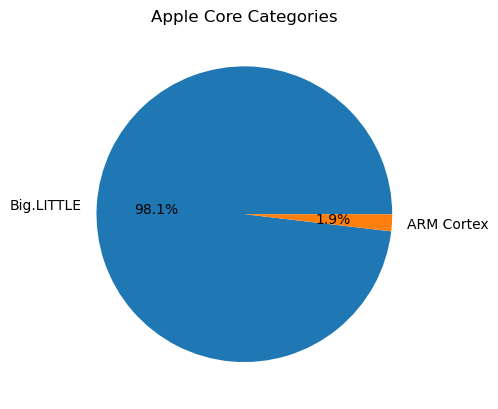

In [37]:
apple_cores = df[df['Designer'] == 'Apple']['Core Category'].value_counts()
apple_cores.plot.pie(autopct='%1.1f%%', title='Apple Core Categories')
plt.ylabel("")
plt.show()
